In [26]:
import fastf1
import fastf1.plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl.styles import PatternFill
from openpyxl import Workbook
from openpyxl import load_workbook
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [51]:
session = fastf1.get_session(2023,"Miami","Q")
session.load()


core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.3.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False

In [52]:
session.event

RoundNumber                                                   5
Country                                           United States
Location                                                  Miami
OfficialEventName    FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023
EventDate                                   2023-05-07 17:30:00
EventName                                      Miami Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2023-05-05 14:00:00
Session2                                             Practice 2
Session2Date                                2023-05-05 17:30:00
Session3                                             Practice 3
Session3Date                                2023-05-06 12:30:00
Session4                                             Qualifying
Session4Date                                2023-05-06 16:00:00
Session5                                

### Pre defined

In [53]:
compound_color = {'HARD': 'F0F0EC', 
                  'INTERMEDIATE': '43B02A', 
                  'MEDIUM': 'FFD12E', 
                  'SOFT': 'DA291C', 
                  'TEST-UNKNOWN': '434649', 
                  'UNKNOWN': '00FFFF', 
                  'WET': '0067AD'}
compound = ['All Compounds','SOFT','MEDIUM','HARD']

In [54]:
def max_lap(laps):
    grouped = laps.groupby("Driver")
    count_values = grouped['LapNumber'].count()
    return count_values.max()

In [55]:
laps = session.laps.pick_quicklaps()
max_lap = int(max_lap(laps)+1)
max_lap_time = int(session.laps["LapTime"].dt.total_seconds().max())
drivers = session.drivers
comp = 0

In [56]:
laps['LapTimeMinute'] = pd.to_timedelta(laps['LapTime'])
laps['LapTimeMinute'] = laps['LapTimeMinute'].apply(lambda x: f"{x.seconds//60:02d}:{x.seconds%60:02d}.{x.microseconds//1000:03d}")

C:\Users\GTR\AppData\Local\Temp\ipykernel_9084\526366515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeMinute'] = pd.to_timedelta(laps['LapTime'])
C:\Users\GTR\AppData\Local\Temp\ipykernel_9084\526366515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeMinute'] = laps['LapTimeMinute'].apply(lambda x: f"{x.seconds//60:02d}:{x.seconds%60:02d}.{x.microseconds//1000:03d}")


In [57]:
sector_time = []
lap = laps.pick_driver(1).pick_fastest()
sector_time.append(lap["Sector1Time"])
sector_time.append(lap["Sector2Time"])
sector_time.append(lap["Sector3Time"])
sector_time[1] = sector_time[0] + sector_time[1]
sector_time[2] = sector_time[1] + sector_time[2]
lap_tele = laps.pick_driver(1).pick_fastest().get_telemetry()
sector_distance = []
sector_distance.append(lap_tele.loc[lap_tele["Time"] <= sector_time[0],"Distance"].max())
sector_distance.append(lap_tele.loc[lap_tele["Time"] <= sector_time[1],"Distance"].max())
sector_distance.append(lap_tele["Distance"].max())

In [87]:
drivers = ['16','1']

In [88]:
# Create void lists that contain data of each driver car
Distance = []
vcar = []
Throttle = []
Brake = []
DRS = []
RPM = []
nGear = []
Time = []
TimeS = []

# insert data to lists that contain data of each driver car
for i in drivers:
    car_data = laps.pick_driver(i).pick_fastest().get_telemetry()
    Distance.append(car_data['Distance'].values.tolist())
    vcar.append(car_data['Speed'].values.tolist())
    Throttle.append(car_data['Throttle'])
    Brake.append(car_data['Brake'])
    DRS.append(car_data['DRS'])
    RPM.append(car_data['RPM'])
    nGear.append(car_data['nGear'])
    # Time.append(car_data['Time'].values.tolist())
    Time.append(car_data['Time'].dt.total_seconds().values.tolist())

In [89]:
# list_1 = []
# for i in range(0,len(Time[1])):
#     if ((i+1) % 23 != 0):
#         list_1.append(Time[1][i])
# print(len(list_1))

In [90]:
# def Seconds(Time):
#     TimeS = []
#     for i in range(len(Time)):
#         TimeS.append(Time.iloc[i].total_seconds())
#     return(TimeS)

In [91]:
def DRS_Converter(DRS1):
    liste = []
    for i in range(len(DRS1)):
        if(DRS1.iloc[i]==8 or DRS1.iloc[i]==0):
            liste.append(0)
        else:
            liste.append(1)
    return(liste)

In [92]:
list_1 = []
dif = len(Time[1])-len(Time[0])

if (dif<0):
    div = int(max([len(Time[1]),len(Time[0])])/abs(dif))
    for i in range(0,len(Time[0])):
        if ((i+1) % div != 0):
            list_1.append(Time[0][i])
    Time[0] = list_1
elif(dif>0):
    div = int(max([len(Time[1]),len(Time[0])])/abs(dif))
    for i in range(0,len(Time[1])):
        if ((i+1) % div != 0):
            list_1.append(Time[1][i])
    Time[1] = list_1
Time[1]= result = [a - b for a, b in zip(Time[0], Time[1])]
Time[0]= result = [a - b for a, b in zip(Time[0], Time[0])]

In [93]:
def min_length_list(list1, list2):
    if len(list1) <= len(list2):
        return list1
    else:
        return list2

In [94]:
df = pd.read_csv("C:/Users/GTR/Documents/GitHub/F1-Circuits-Corners/corners_circuits/United States_Miami.csv")
corners_distance = df["Distance"]

659
659


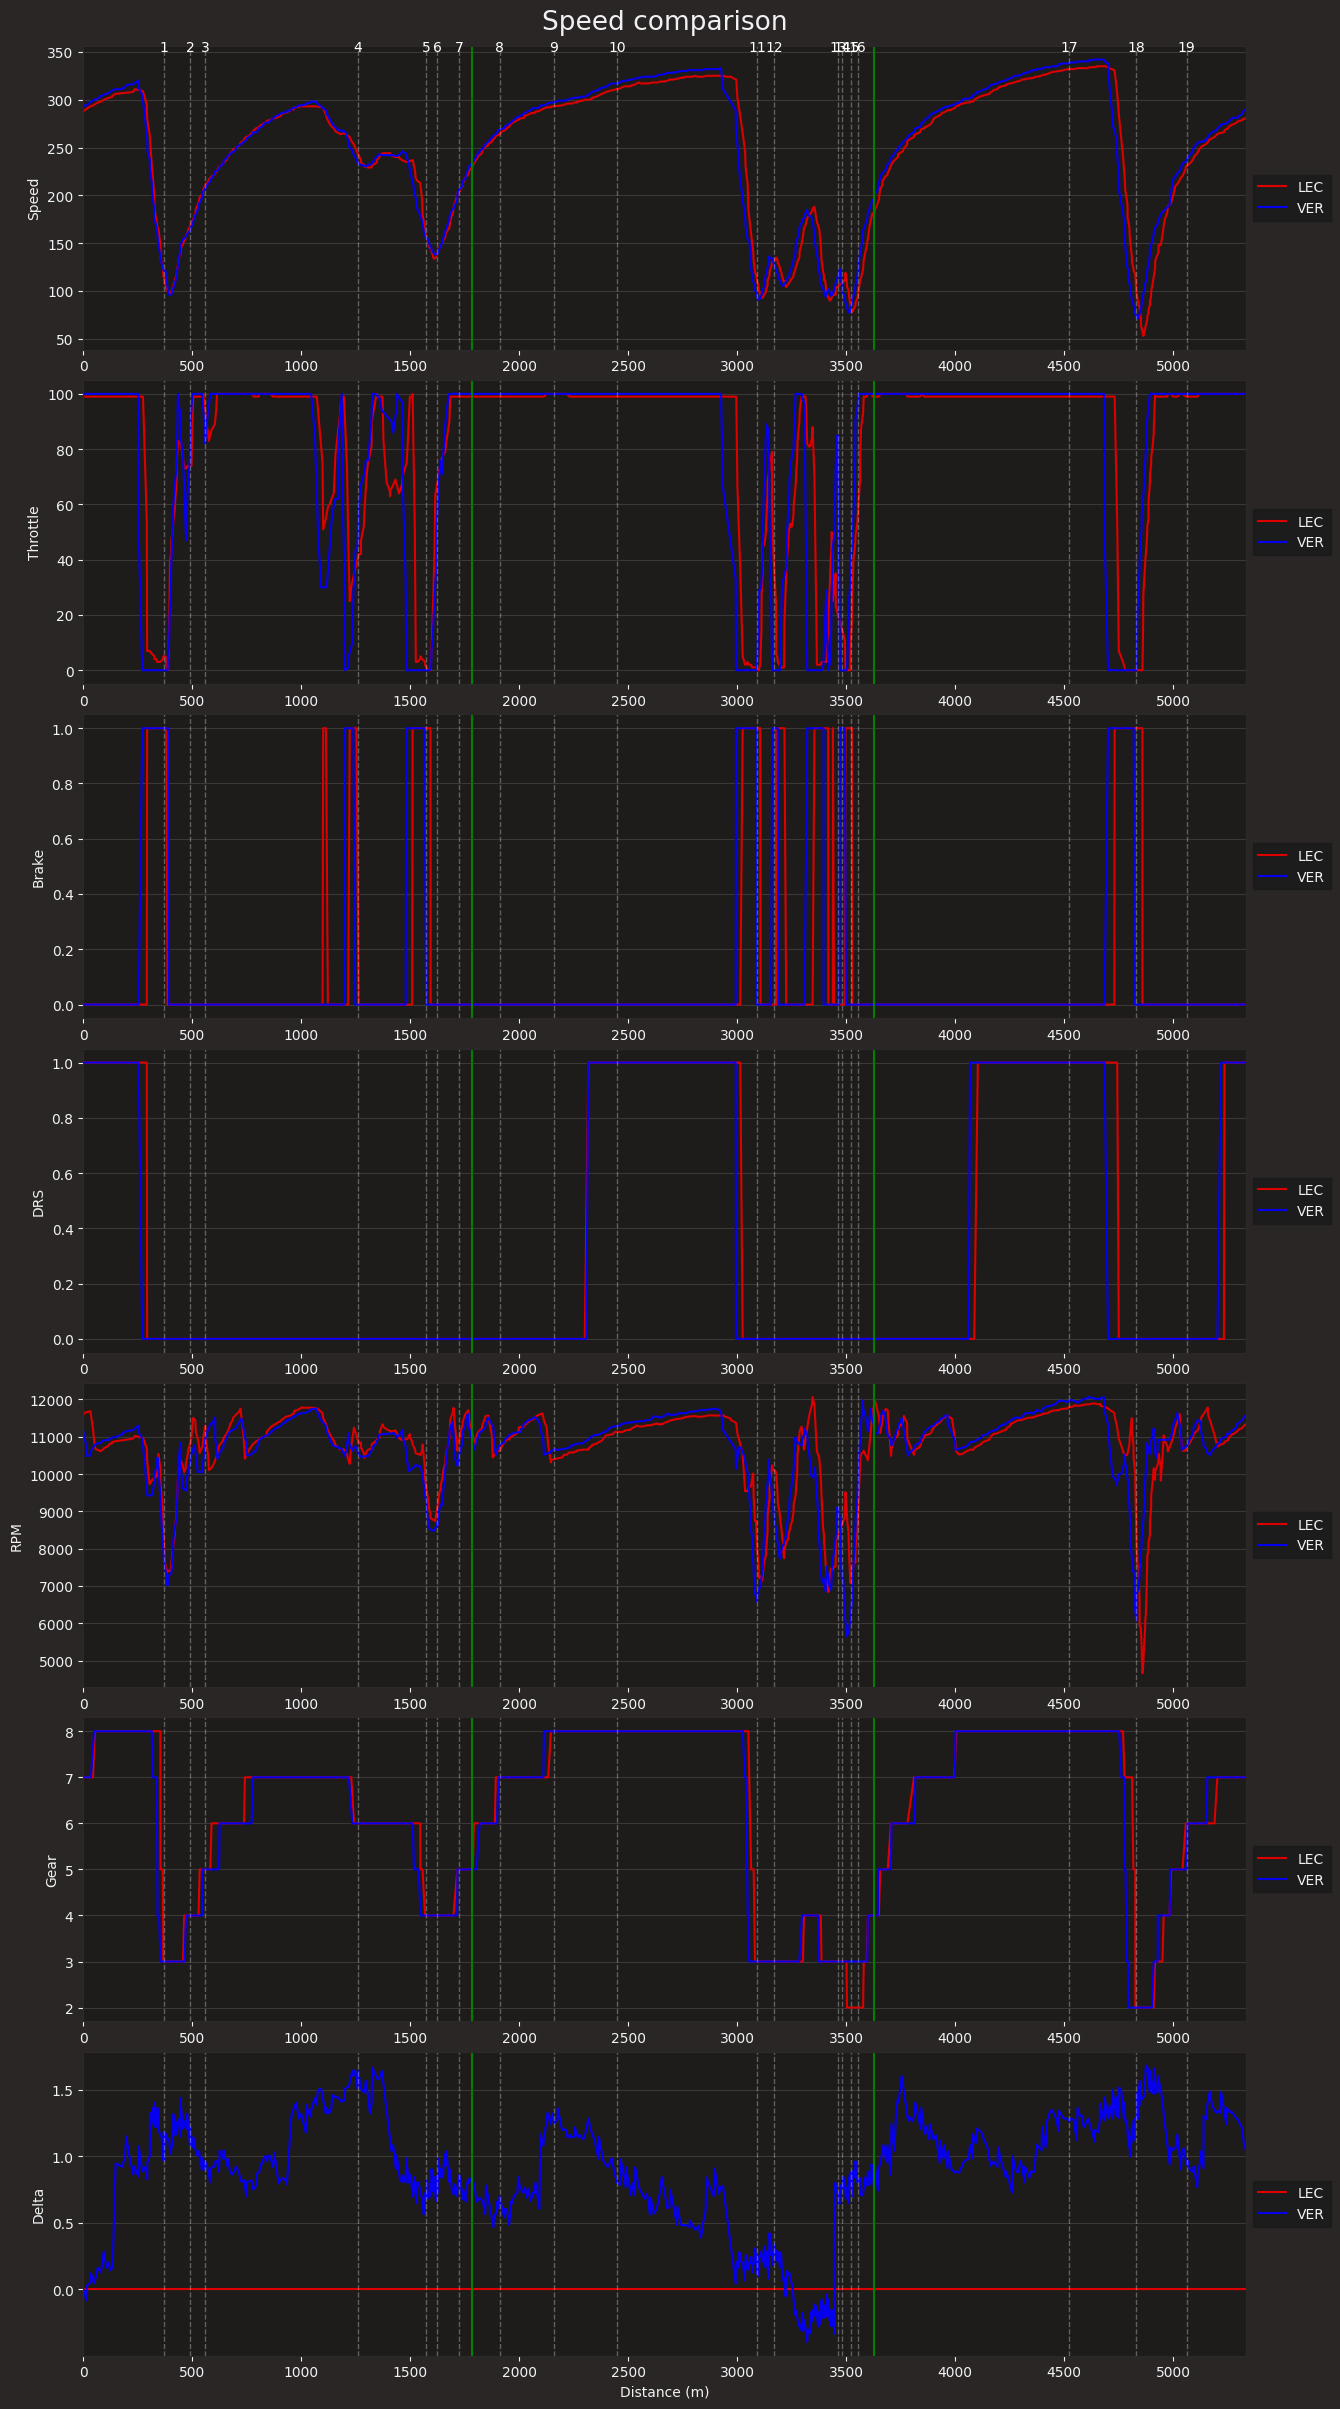

In [104]:
import matplotlib.pyplot as plt

# Data for the plots

# Create subplots with 7 rows and 1 column
fig, axs = plt.subplots(7, 1, figsize=(15, 30))

# Plot the first graph in the first subplot
# print(len(Time[0]))
# print(len(Time[1]))
j=0
for i in drivers:
    driver_name = session.get_driver(i)["Abbreviation"]
    team_color =  fastf1.plotting.team_color(session.get_driver(i)["TeamName"])

    axs[0].plot(Distance[j], vcar[j], color=team_color ,label=driver_name)
    axs[1].plot(Distance[j], Throttle[j], color=team_color,label=driver_name)
    axs[2].plot(Distance[j], Brake[j], color=team_color,label=driver_name)
    axs[3].plot(Distance[j], DRS_Converter(DRS[j]), color=team_color,label=driver_name)
    axs[4].plot(Distance[j], RPM[j], color=team_color,label=driver_name)
    axs[5].plot(Distance[j], nGear[j], color=team_color,label=driver_name)
    print(len(Time[j]))
    axs[6].plot(min_length_list(Distance[0], Distance[1]), Time[j], color=team_color,label=driver_name)
    j=j+1


axs[0].set_ylabel('Speed')
axs[1].set_ylabel('Throttle')
axs[2].set_ylabel('Brake')
axs[3].set_ylabel('DRS')
axs[4].set_ylabel('RPM')
axs[5].set_ylabel('Gear')
axs[6].set_ylabel('Delta')

axs[0].set_title('Speed comparison')
# axs[1].set_title('Throttle comparison')
# axs[2].set_title('Brake comparison')
# axs[3].set_title('DRS comparison')
# axs[4].set_title('RPM comparison')
# axs[5].set_title('Gear comparison')
# Plot the first graph in the seventh subplot


# Plot the second graph in the seventh subplot
# axs[6].plot(Distance1, Delta, color='Red')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.1)
for i in range(0,7):
    axs[i].set_xlabel('Distance (m)')
    axs[i].grid(axis = 'y',alpha = 0.2)
    axs[i].set_xticks(range(0, 8000, 500)) 
    axs[i].set_xlim(0, sector_distance[2]) 
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[i].axvline(x=sector_distance[0], color='green', linestyle='-')
    axs[i].axvline(x=sector_distance[1], color='green', linestyle='-')
    for j in range(0,len(corners_distance)):
        axs[i].axvline(x=corners_distance[j], color='white', linestyle='--', linewidth=1, alpha=0.3)
for j in range(0,len(corners_distance)):
    axs[0].text(corners_distance[j],355,str(j+1), ha='center', va='center',color='white')
    


plt.plot()
# Show the plot
plt.show()

In [96]:
# i = 790
# plt.plot(car_data["X"],car_data["Y"],color = 'red')
# plt.scatter(car_data.iloc[i]["X"],car_data.iloc[i]["Y"],color = 'Blue')
# print(car_data.iloc[i]["Distance"])
# corners_distance = [365,1045,1133,1251,2378,2497,2619,3063,3298,3792,4085,4483,4662,4913,5188,5894,6167,6702,6777]

In [97]:
# maxlap = laps.pick_driver(1).pick_fastest().get_telemetry().reset_index(drop=True)
# team_color =  fastf1.plotting.team_color(session.get_driver('1')["TeamName"])
# maxlap["TeamColor"] = team_color

In [98]:
# leclap = laps.pick_driver(16).pick_fastest().get_telemetry().reset_index(drop=True)
# team_color =  fastf1.plotting.team_color(session.get_driver('16')["TeamName"])
# leclap["TeamColor"] = team_color

In [99]:
# list_1 = []
# dif = len(maxlap)-len(leclap)

# if (dif<0):
#     div = int(len(leclap)/abs(dif))

#     for i in range(0,len(leclap)):
#         if ((i+1) % div == 0):
#             leclap = leclap.drop(i)
#         # print(i)
#     leclap.reset_index(drop=True)
# elif(dif>0):
#     div = int(len(maxlap)/abs(dif))
#     for i in range(0,len(maxlap)):
#         if ((i+1) % div == 0):
#             maxlap = maxlap.drop(i)
#     maxlap.reset_index(drop=True)

In [100]:
# plot = maxlap[["Speed","X","Y","TeamColor"]]

In [101]:
# for i in range(0,len(plot)):
#     if (plot.iloc[i]["Speed"] < leclap.iloc[i]["Speed"]):
#         plot.iloc[i,0] = leclap.iloc[i,leclap.columns.get_loc('Speed')]
#         plot.iloc[i,3] = leclap.iloc[i,leclap.columns.get_loc('TeamColor')]

In [102]:
# plt.scatter(plot["X"],plot["Y"],color = plot["TeamColor"])